Looking at data from runs on Feb 17


generated weights, tract lengths and conduction velocity, 10 nodes
with constant intial conditions and then random (no noise both)

The estimated weights and cv


Trying to see if the random initial conditions is what is causing the multiple solutions

In [1]:
import sys
import glob
import numpy as np
import seaborn as sns


OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

Extra Helper Functions

In [2]:
def plot_ts(nodes, all_ts):


    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])

    plt.show()

Choosing which jobs to analyze

In [3]:
# CHANGE THIS CELL ACCORDING TO DATA YOU ARE ANALYZING
"""
est weights
958440
958443

est cv
958441
958442



"""
NTASKS =80
JOB= ['958440', '958443', '958441', '958442']
NUM_JOBS = len(JOB)

Loading all the data we need for analysis

In [4]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")
    if len(var) ==1:
        load_files[job] = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 4


{'958440': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-17/958440/load_genvars_delays1.py',
 '958441': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-17/958441/load_genvars_delays2.py',
 '958442': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-17/958442/load_genvars_delays2b.py',
 '958443': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-17/958443/load_genvars_delays1b.py'}

In [5]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) == NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res)
    else:
        print("Error", job)
        break

0  Job: 958440, lowest MSE:  0.004840495840283531
1  Job: 958443, lowest MSE:  0.0029533076050837935
2  Job: 958441, lowest MSE:  8.640830295797129e-29
3  Job: 958442, lowest MSE:  0.1598326609312115


Plot of MEG time series of Target Data and Correlation Matrix

/gpfs/fs0/scratch/l/lfefebvr/noorir/model/helper_functions.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/traitlets/config/application.py", line 658, i

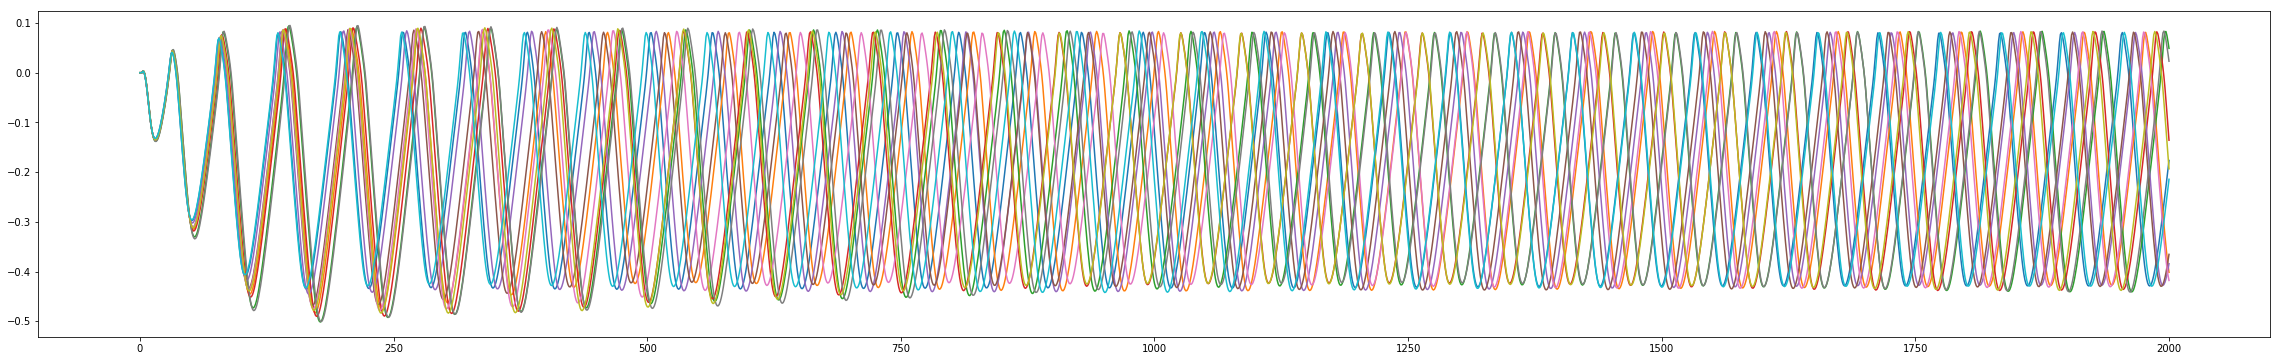

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

exec(open(load_files[JOB[0]]).read())
plot_ts(nodes, ue_array)

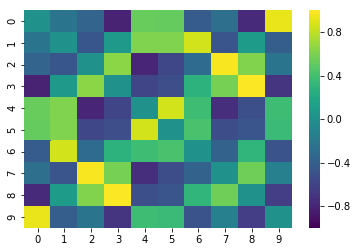

In [7]:
sns.heatmap(targ_data, vmax = 1, vmin = -1, cmap = "viridis")

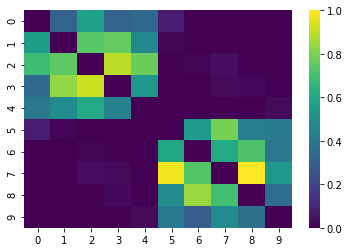

In [8]:
sns.heatmap(w_mat, vmax = 1, vmin = 0, cmap = "viridis")

In [10]:
c_mat

array([[ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.000

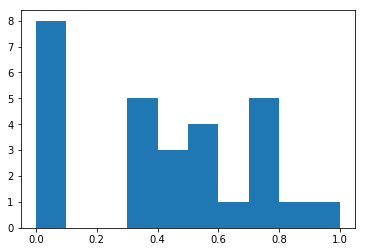

In [11]:
vals = np.triu(w_mat,1).ravel()
vals_n = vals[vals>0]
plt.hist(vals_n)
plt.show()

# STARTING ANALYSIS

Plotting all histograms of all the conduction vel / weights estimates

1 JOB #:  958440 min: 0.020972828484355277 max: 0.9856013186594759 avg: 0.47246634176518226
2 JOB #:  958443 min: 0.06798869796373969 max: 0.9951176171939701 avg: 0.5220262925038233
3 JOB #:  958441 min: 2261.4959689145444 max: 5906.008512240993 avg: 3969.5213022524686
4 JOB #:  958442 min: 2173.9866891538063 max: 5925.8891274400485 avg: 4256.118277937793


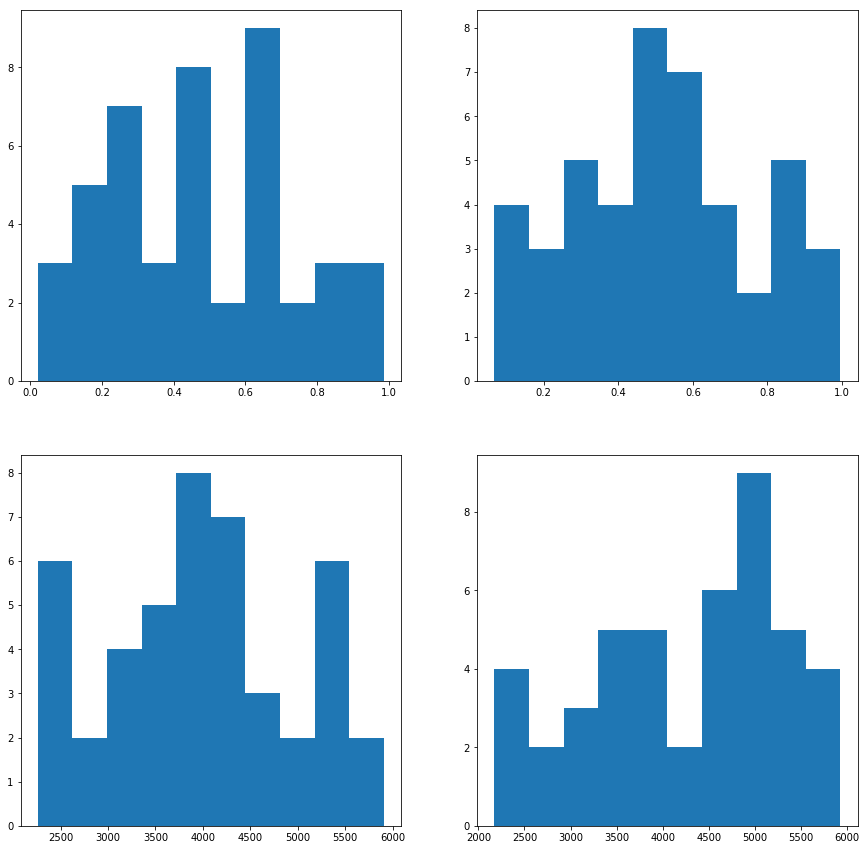

In [14]:
plt.figure(figsize=(15.0,15.0))
for i in range(NUM_JOBS): 
    plt.subplot(2, 2, i+1)


    print(i+1, "JOB #: ", JOB[i], "min: {} max: {} avg: {}".format(np.min(all_res[JOB[i]]), 
                                                                   np.max(all_res[JOB[i]]), np.average(all_res[JOB[i]])))
    plt.hist(all_res[JOB[i]])
    #row major counting


In [ ]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure

top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

Looking at solution matrices

JOB #: 958440, max: 0.9856013186594759 min: 0.020972828484355277
JOB #: 958443, max: 0.9951176171939701 min: 0.06798869796373969
JOB #: 958441, max: 5906.008512240993 min: 2261.4959689145444
JOB #: 958442, max: 5925.8891274400485 min: 2173.9866891538063


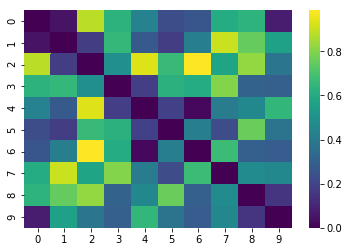

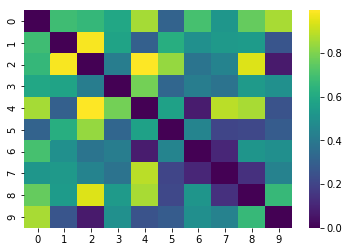

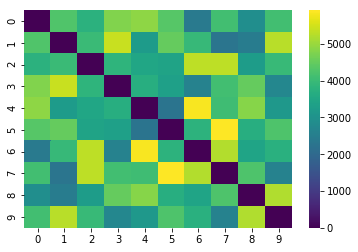

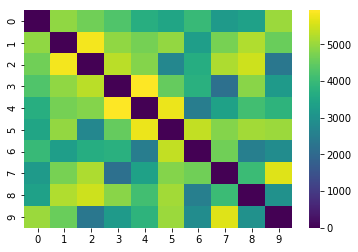

In [16]:
# ALL THE RESULTS AT ONCE

for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    ind = 0
    mat = np.ones((nodes, nodes))
    for row in range(0,nodes):
        for col in range(row+1, nodes):
            mat[row,col] = all_res[JOB[i]][ind]
            mat[col,row] = all_res[JOB[i]][ind]
            ind += 1
    np.fill_diagonal(mat,0)
    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(all_res[JOB[i]]), np.min(all_res[JOB[i]])))
    plt.figure()
    sns.heatmap(mat, cmap = "viridis")

In [ ]:
"""
    if plot == "corr":
        np.fill_diagonal(exp_data, 0)
        plot_mat(exp_data,"opt corr", 1, -1)
        print("MSE", res)
    if plot == "delay":
        plot_mat(delays,"Delays")
    if plot == "cw":
        if optim =="c":
            plot_mat(cmat, "opt c",  0.0005, 0)
        if optim =="w":
            plot_mat(wmat, "opt w", 0, 1)
"""
for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    
    if evol_params['optim'] =='w':
        MAT = c_mat
    elif evol_params['optim'] =='c':
        MAT = w_mat
    hf.residuals_cw_corr(all_res[JOB[i]], wc_params, targ_data, nodes, tract_mat, MAT, skip, 
                         wc_seed, evol_params['optim'],plot = "corr")

    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(all_res[JOB[i]]), np.min(all_res[JOB[i]])))

Conclusion: Doesn't seem like making the initial conditions constant changes them multiciplity of solutions

Try making the stopping condition the MSE of the whole set (original DE algorithm)